# GROUP ONE

In [37]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
% matplotlib inline

## 1.Make a map of power plants in the US, color coded by type

In [40]:
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [41]:
power_plants = pd.read_csv("powerplants.csv")
power_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486


In [42]:
bounds = [
            [
              -131.484375,
              20.96143961409684
            ],
            [
              -56.25,
              20.96143961409684
            ],
            [
              -56.25,
              51.6180165487737
            ],
            [
              -131.484375,
              51.6180165487737
            ],
            [
              -131.484375,
              20.96143961409684
            ]
]
box = Polygon(bounds)
continental = states[states.to_crs({'init': 'epsg:4326'}).within(box)].to_crs({'init': 'epsg:5070'})
continental.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((122663.9817664425 1495564.993218174,..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,(POLYGON ((-2066923.366569909 1403703.12227994...
5,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,POLYGON ((-1123222.583672025 1807303.824289338...


In [43]:
def make_point(row):
    return Point(row.Longitude, row.Latitude) 
points = power_plants.apply(make_point, axis=1)
power_plants = gpd.GeoDataFrame(power_plants, geometry=points)
power_plants.crs = {'init': 'epsg:4326'}
power_plants = power_plants[power_plants.within(box)].to_crs(continental.crs)
power_plants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (796926.8336524522 1190764.260331179)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (759769.2812470195 913190.5319579486)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (905570.2654503169 1103206.900227695)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (917759.2648613909 1264879.229025812)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (809750.0440997988 1212771.116147024)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

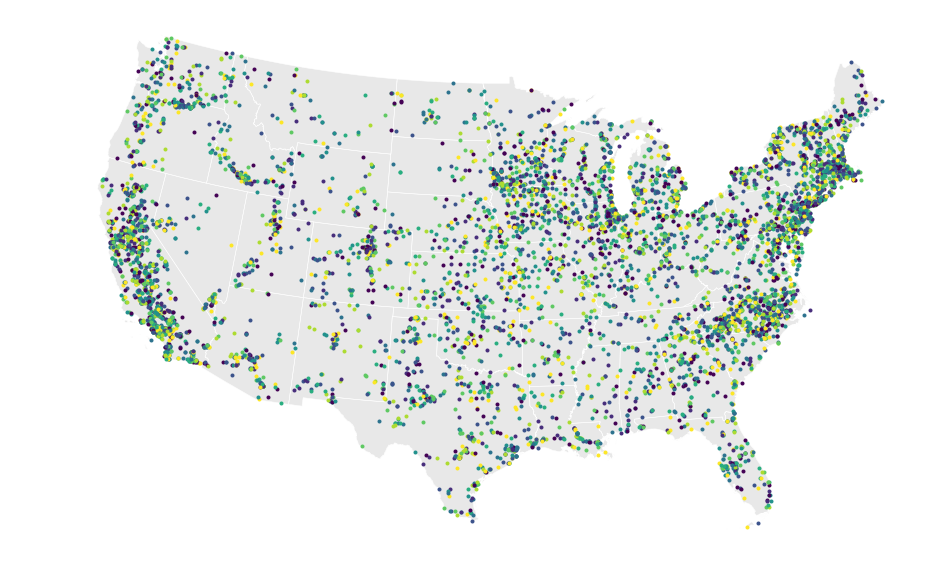

In [44]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='lightgrey', edgecolor='white')
power_plants.plot(ax=ax, markersize=3, legend=True)
ax.axis('off')

## 2.Make a map of air quality stations, color coded by worst air quality ever 

In [45]:
df = pd.read_csv('pm25_annual_fixed.csv')
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.0,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,12.4,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,10.0,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,9.6,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,11.9,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18


In [46]:
def make_point(row):
    return Point(row.Longitude, row.Latitude) 
points = df.apply(make_point, axis=1)
air_quality = gpd.GeoDataFrame(df, geometry=points)
air_quality.crs = {'init': 'epsg:4326'}
air_quality = air_quality[air_quality.within(box)].to_crs(continental.crs)
air_quality.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change,geometry
0,1,3,10,88101,1,30.497478,-87.880258,NAD83,PM2.5 - Local Conditions,24 HOUR,...,5.7,3.8,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18,POINT (776937.6164835709 857822.2885195042)
1,1,27,1,88101,1,33.284928,-85.803608,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.7,2.9,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2017-05-18,POINT (941707.5315372415 1185667.146516143)
2,1,33,1002,88101,1,34.762619,-87.638097,NAD83,PM2.5 - Local Conditions,24 HOUR,...,7.1,3.5,MUSCLE SHOALS,WILSON DAM RD AND 2ND ST.,Alabama,Colbert,Muscle Shoals,"Florence-Muscle Shoals, AL",2017-05-18,POINT (758253.1528025317 1333625.147532214)
3,1,49,1003,88101,1,34.288567,-85.969858,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,4.2,CROSSVILLE,"13112 HWY.68 , CROSSVILLE AL. 35962",Alabama,DeKalb,Crossville,"Fort Payne, AL",2017-05-19,POINT (914597.8016373862 1295541.80643867)
4,1,55,10,88101,1,33.991494,-85.992647,NAD83,PM2.5 - Local Conditions,24 HOUR,...,8.2,3.9,GADSDEN C. COLLEGE,"1001 WALLACE DRIVE, GADSDEN, AL 35902",Alabama,Etowah,Gadsden,"Gadsden, AL",2017-05-18,POINT (916017.7554644654 1262300.539034021)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

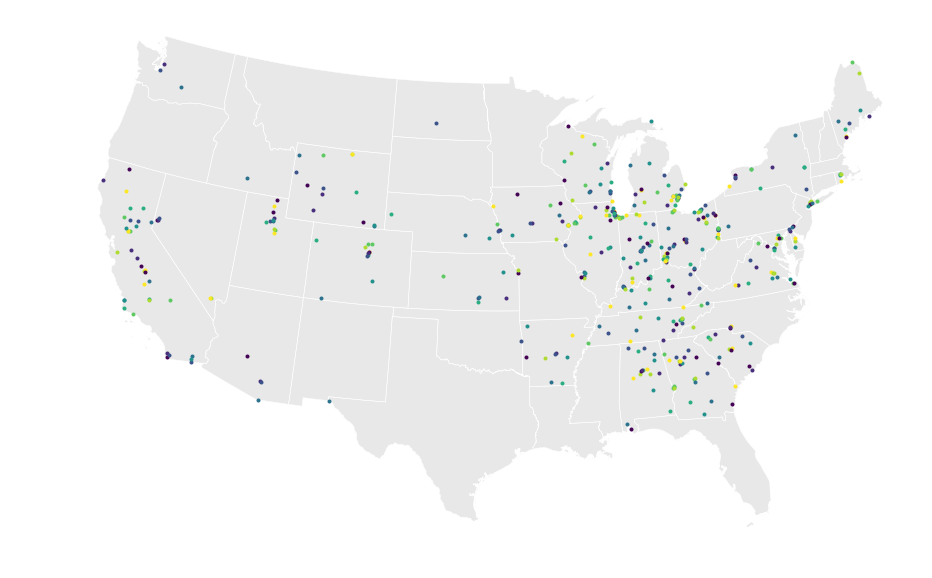

In [47]:
ax = continental.plot(figsize=(20, 10), linewidth=0.5, color='lightgrey', edgecolor='white')
air_quality.plot(figsize=(20, 10), markersize=3, ax=ax)
ax.axis('off')

## 3.Map all of the nuclear power plants in red, with the rest of the plants as dark grey.

In [48]:
power_plants.columns

Index(['Plant_Code', 'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam',
       'City', 'County', 'Zip', 'Street_Add', 'PrimSource', 'Total_MW',
       'Coal_MW', 'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW',
       'Nuclear_MW', 'Solar_MW', 'Wind_MW', 'Geo_MW', 'Other_MW', 'source_des',
       'tech_desc', 'Source', 'Period', 'Latitude', 'Longitude', 'geometry'],
      dtype='object')

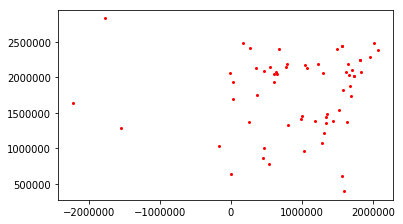

In [49]:
nuclear_plants = power_plants[power_plants.PrimSource.isin(['nuclear'])]
nuclear_plants.plot(color='red')

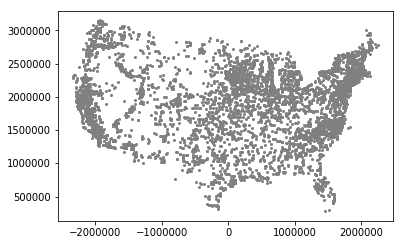

In [50]:
non_nuclear = power_plants[~power_plants.PrimSource.isin(['nuclear'])]
non_nuclear.plot(color='grey')

(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

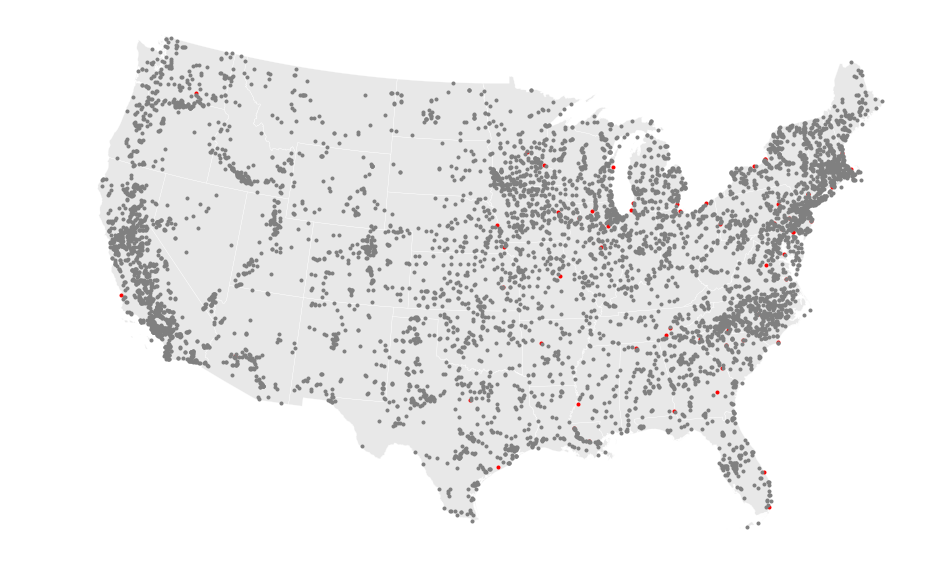

In [51]:
ax = continental.plot(figsize=(20,10), color='lightgrey', linewidth=0.25, edgecolor='white')
nuclear_plants.plot(color='red', ax=ax, markersize=3)
non_nuclear.plot(color='grey', ax=ax, markersize=3)
ax.axis('off')

# GROUP TWO

## 1.Which power plants are in New York?

In [52]:
powerplants_states = gpd.sjoin(power_plants, continental, how='left', op='within')
powerplants_states.head(5)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,...,0,0400000US01,1.311737e+11,4.593686e+09,01,00,Alabama,01,01779775,AL


In [53]:
powerplants_states[powerplants_states['STUSPS'] == 'NY']

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas & Elec Corp,3249,Electric Utility,Coxsackie,Greene,12051,Baily Street,petroleum,...,43,0400000US36,1.220530e+11,1.924310e+10,36,00,New York,36,01779796,NY


## 2.Which state produces the most energy from coal?

In [54]:
powerplants_states.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False).head()

NAME
Texas           23588.5
Indiana         16111.4
Ohio            15189.9
Illinois        14644.6
Pennsylvania    13313.4
Name: Coal_MW, dtype: float64

## 3.Map states with nuclear power plants in red, and states without in grey. 

In [55]:
nuclear = powerplants_states.groupby('NAME')['Nuclear_MW'].sum().reset_index()
nuclear.head()

,NAME,Nuclear_MW
0,Alabama,5066.4
1,Arizona,3937.0
2,Arkansas,1808.5
3,California,2240.0
4,Colorado,0.0


In [56]:
nuclear_states = continental.merge(nuclear, how='left', on='NAME')
nuclear_states['color'] = 0
nuclear_states.loc[nuclear_states['Nuclear_MW'] > 0, 'color'] = 1
nuclear_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Nuclear_MW,color
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,5066.4,1
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,3937.0,1
2,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((122663.9817664425 1495564.993218174,...",1808.5,1
3,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,(POLYGON ((-2066923.366569909 1403703.12227994...,2240.0,1
4,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,POLYGON ((-1123222.583672025 1807303.824289338...,0.0,0


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

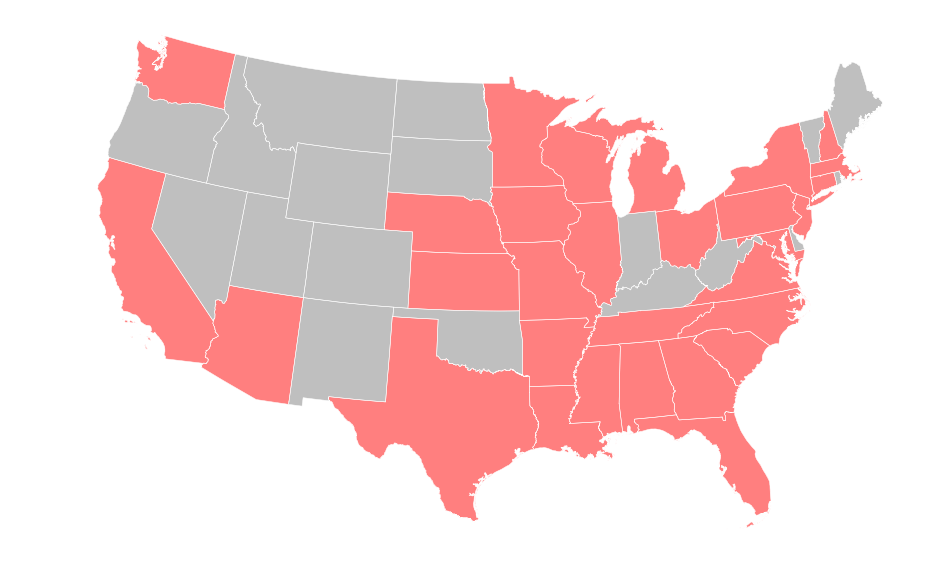

In [57]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, 'grey'), (1, 'red')])
ax = nuclear_states.plot(figsize=(20, 10), linewidth=0.5, column='color', cmap=cmap, edgecolor='white')
ax.axis('off')

## 4.Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [58]:
wind = powerplants_states.groupby('NAME')['Wind_MW'].sum().reset_index()
wind_states = continental.merge(wind, how='left', on='NAME')
wind_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Wind_MW
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,0.0
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,267.3
2,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((122663.9817664425 1495564.993218174,...",0.0
3,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,(POLYGON ((-2066923.366569909 1403703.12227994...,5720.9
4,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,POLYGON ((-1123222.583672025 1807303.824289338...,2961.8


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

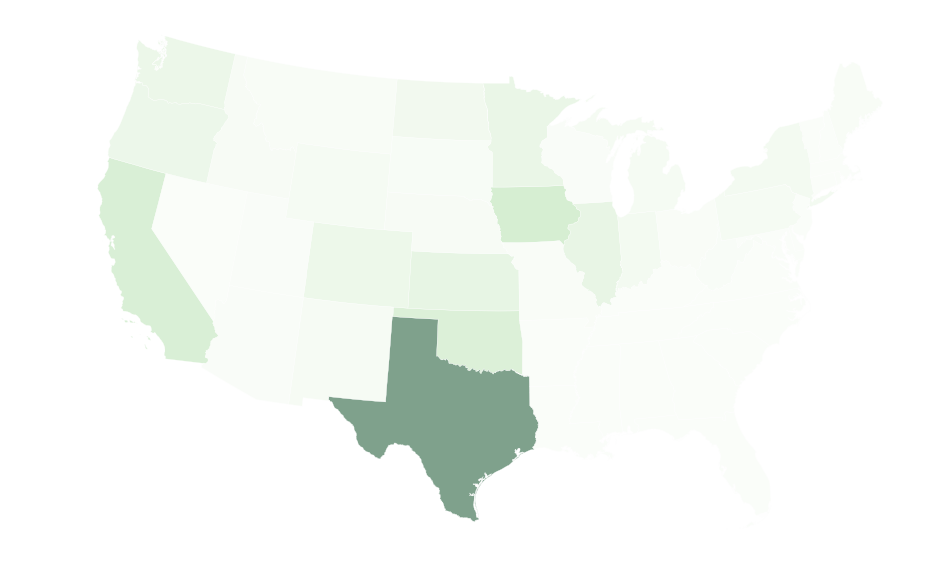

In [64]:
ax = wind_states.plot(figsize=(20, 10), linewidth=0.25, column='Wind_MW', cmap='Greens', edgecolor='white')
ax.axis('off')

## 5.Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

In [68]:
worst_air = continental.merge(air_quality.groupby('State Name')['1st Max Value'].max().reset_index(), how='left', left_on='NAME', right_on='State Name')
worst_air.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,State Name,1st Max Value
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,(POLYGON ((760323.7307427037 857474.7284922774...,Alabama,47.7
1,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,POLYGON ((-1746851.979208977 1221914.112159756...,Arizona,21.5
2,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((122663.9817664425 1495564.993218174,...",Arkansas,16.6
3,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,(POLYGON ((-2066923.366569909 1403703.12227994...,California,46.4
4,0400000US08,268429343790,1175112870,08,00,Colorado,08,01779779,CO,POLYGON ((-1123222.583672025 1807303.824289338...,Colorado,26.2


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

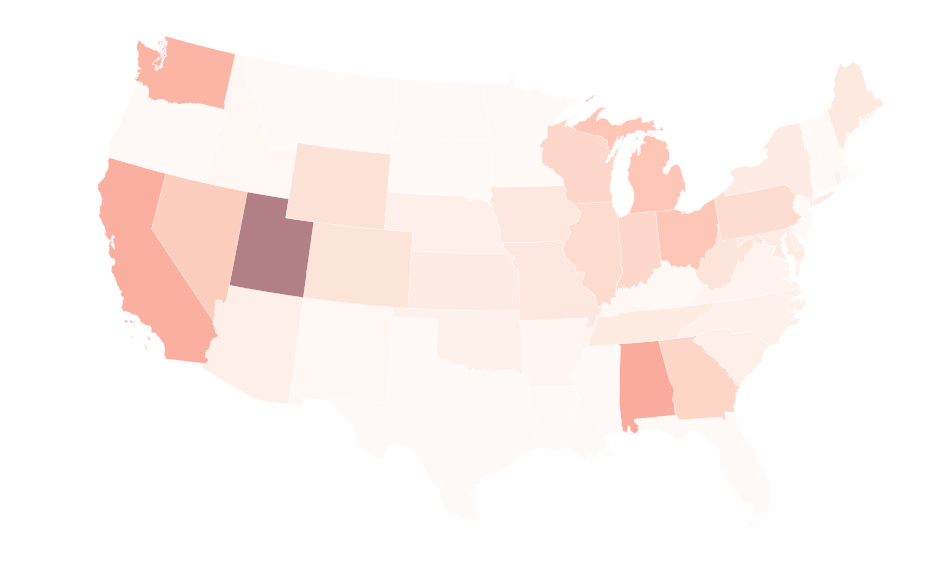

In [69]:
ax = worst_air.plot(figsize=(20, 10), linewidth=0.25, column='1st Max Value', cmap='Reds', edgecolor='white')
ax.axis('off')

# GROUP THREE

## 1.Which power plants are within 75 miles of New York City?

In [72]:
NYC = gpd.GeoDataFrame(geometry=[Point(-74.0059413, 40.7127837)])
NYC.crs = {'init': 'epsg:4326'}
NYC = NYC.to_crs(continental.crs)
NYC_buffer = NYC.buffer(120701)
within_75 = power_plants[power_plants.within(NYC_buffer.loc[0])]
within_75

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
341,539,Rocky River (CT),FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,200 Kent Road,pumped storage,...,0.0,NaN,NaN,Pumped Storage = 29.4 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,41.582600,-73.434900,POINT (1849937.061683165 2284876.360576653)
342,540,Branford,Connecticut Jet Power LLC,22379,IPP Non-CHP,Branford,New Haven,6450,Route 1,petroleum,...,0.0,NaN,NaN,Petroleum = 17.4 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.292500,-72.794200,POINT (1909280.145587145 2266014.413640415)
343,541,Bulls Bridge,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,781 Kent Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 8.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.659046,-73.491984,POINT (1843337.824366606 2292082.725726847)
344,542,Cos Cob,Connecticut Jet Power LLC,22379,IPP Non-CHP,Greenwich,Fairfield,6430,Sound Shore Drive,petroleum,...,0.0,NaN,NaN,Petroleum = 95.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.028900,-73.598900,POINT (1851218.51013529 2221426.212879802)
345,544,Devon Station,Devon Power LLC,22350,IPP Non-CHP,Milford,New Haven,6460,734 Naugatuck Avenue,petroleum,...,0.0,NaN,NaN,Petroleum = 132.5 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.209797,-73.108976,POINT (1886096.663335207 2250741.132285696)
350,552,Shepaug,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Southbury,New Haven,6488,2225 River Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 41.5 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.448420,-73.295321,POINT (1864716.062825096 2273010.637495853)
351,553,Stevenson,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,Monroe,Fairfield,6468,1 Roosevelt Drive,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 28.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.383300,-73.171400,POINT (1876431.777262387 2268368.952279679)
362,568,Bridgeport Station,PSEG Power Connecticut LLC,15452,IPP Non-CHP,Bridgeport,Fairfield,6604,1 Atlantic Street,coal,...,0.0,NaN,NaN,"Coal = 383.4 MW, Petroleum = 16.9 MW",Conventional Steam Coal; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,41.170600,-73.184400,POINT (1881045.656298239 2244984.166881919)
1147,2388,Oyster Creek,Exelon Nuclear,55951,IPP Non-CHP,Forked River,Ocean,8731,PO Box 388,nuclear,...,0.0,NaN,NaN,Nuclear = 607.7 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,39.814300,-74.206200,POINT (1832855.996885886 2077258.413622385)
1148,2390,Sayreville,NRG REMA LLC,17235,IPP Non-CHP,Sayerville,Middlesex,8872,River Road,natural gas,...,0.0,NaN,NaN,"Natural Gas = 150 MW, Petroleum = 50 MW",Natural Gas Fired Combustion Turbine; Petroleu...,"EIA-860, EIA-860M and EIA-923",201607,40.476525,-74.352336,POINT (1804025.08186149 2146726.779682845)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

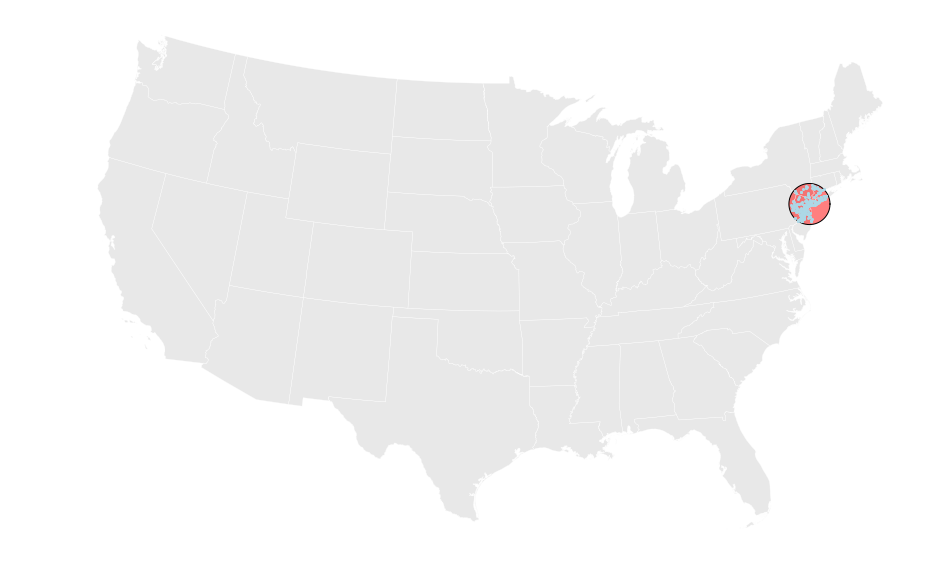

In [77]:
ax = continental.plot(figsize=(20, 10), linewidth=0.25, color='lightgrey', edgecolor='white')
NYC.plot(color='red', ax=ax)
NYC_buffer.plot(color='red', ax=ax)
within_75.plot(color='lightblue', ax=ax)
ax.axis('off')

## 2.Make a map of the power plants within 150 miles of New York City. I want it centered on New York City, zoomed in a good amount.

In [81]:
NYC_buffer = NYC.buffer(241402)
within_150 = power_plants[power_plants.within(NYC_buffer.loc[0])]
within_150.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 4.6 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.949000,-74.206300,POINT (1778509.130207101 2310035.976360777)
341,539,Rocky River (CT),FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,200 Kent Road,pumped storage,...,0.0,NaN,NaN,Pumped Storage = 29.4 MW,Hydroelectric Pumped Storage,"EIA-860, EIA-860M and EIA-923",201607,41.582600,-73.434900,POINT (1849937.061683165 2284876.360576653)
342,540,Branford,Connecticut Jet Power LLC,22379,IPP Non-CHP,Branford,New Haven,6450,Route 1,petroleum,...,0.0,NaN,NaN,Petroleum = 17.4 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.292500,-72.794200,POINT (1909280.145587145 2266014.413640415)
343,541,Bulls Bridge,FirstLight Power Resources Services LLC,54895,IPP Non-CHP,New Milford,Litchfield,6776,781 Kent Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 8.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.659046,-73.491984,POINT (1843337.824366606 2292082.725726847)
344,542,Cos Cob,Connecticut Jet Power LLC,22379,IPP Non-CHP,Greenwich,Fairfield,6430,Sound Shore Drive,petroleum,...,0.0,NaN,NaN,Petroleum = 95.6 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,41.028900,-73.598900,POINT (1851218.51013529 2221426.212879802)


(-2586829.4388886895,
 2488915.8729062313,
 124423.84046021817,
 3317717.6387093915)

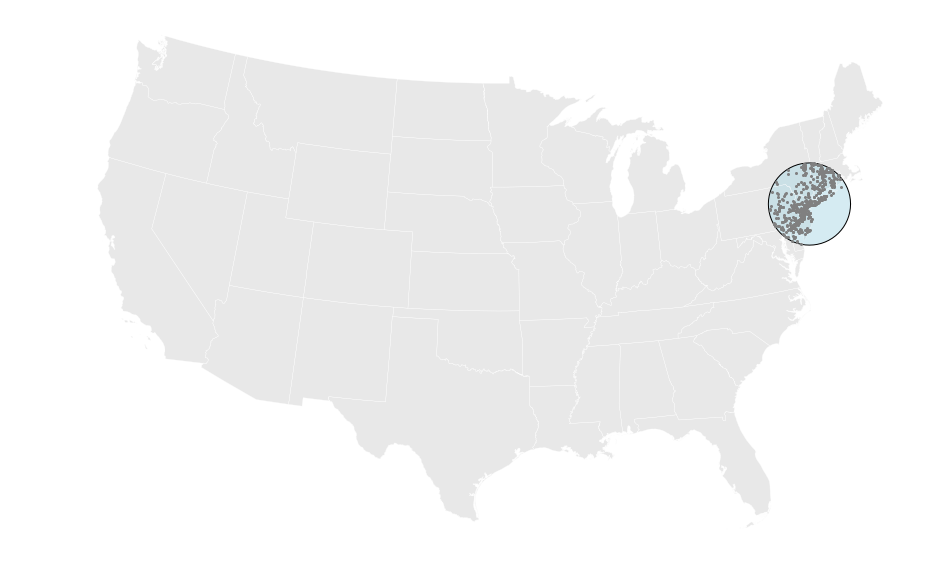

In [86]:
ax = continental.plot(figsize=(20, 10), linewidth=0.25, color='lightgrey', edgecolor='white')
NYC.plot(color='lightblue', ax=ax)
NYC_buffer.plot(color='lightblue', ax=ax)
within_150.plot(color='grey', ax=ax)
ax.axis('off')